In [1]:
from IPython.display import clear_output
!pip install qiskit==0.45.1
clear_output()

In [2]:
!pip show qiskit
!pip show qiskit-terra
!pip show qiskit-aer

Name: qiskit
Version: 0.45.1
Summary: Software for developing quantum computing programs
Home-page: https://qiskit.org/
Author: Qiskit Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: /Users/leann/anaconda3/lib/python3.11/site-packages
Requires: qiskit-terra
Required-by: qiskit-aer, qiskit-ibm-provider
Name: qiskit-terra
Version: 0.45.1
Summary: Software for developing quantum computing programs
Home-page: https://github.com/Qiskit/qiskit
Author: Qiskit Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: /Users/leann/anaconda3/lib/python3.11/site-packages
Requires: dill, numpy, ply, psutil, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy
Required-by: qiskit, qiskit-algorithms, qiskit-ibmq-provider
Name: qiskit-aer
Version: 0.13.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location

In [19]:
!pip install qiskit-ibm-provider
clear_output()

In [20]:
#from qiskit import QuantumCircuit, transpile
#from qiskit.circuit import Parameter
#from qiskit.providers.fake_provider import FakeGuadalupe
#from qiskit import Aer
#from qiskit_ibm_provider import IBMProvider

#from qiskit import IBMQ
#IBMQ.save_account(token='88e6dc156f21e6c193717ff36a6c3586bedf692e7d862c23272f4159e1b9a932847ea6f6daf39fbc5baf47e45233ca07c0f28ccacf3bc9d4f621a3a63a2bb426')
#IBMQ.load_account() # Load account from disk
#IBMQ.providers()    # List all available providers

#provider = IBMQ.get_provider()
#provider.backends()

In [21]:
# Noisy simulator backend
from qiskit.providers import aer
#from qiskit import qiskit_circuit_library
from qiskit.circuit.library import Diagonal
    
#noisy_sim = FakeGuadalupe()

from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')

In [22]:
import numpy as np
from scipy import sparse
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})  # enlarge matplotlib fonts

from qiskit.opflow import MatrixOp

/var/folders/05/ddc9tzds32j79jy03cjnxk_r0000gn/T/ipykernel_24025/596540703.py:8: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import MatrixOp


In [23]:
import numpy as np
from scipy import sparse
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})  # enlarge matplotlib fonts

from qiskit.opflow import MatrixOp

In [25]:
total_res = {}

N = 4   # number of qubits
dim = 2**N # dimension of the operator A

# Setup a tridiagonal matrix
k = [np.ones(dim-1), -2*np.ones(dim), np.ones(dim-1)]
offset = [-1, 0, 1]
A = diags(k,offset).toarray()

# Setup the driving term f(x) = 3x+5
#b = np.linspace(0, 1, dim)
b = [5]
sampled_b = []
x_i = 0
h = 1/(dim-1)
for i in range(dim):
    iterative_x = (x_i + i*h)
    b.append(3*iterative_x+5)
    sampled_b.append((3*iterative_x+5)*(h**2))

print('b:',b)
print('sampled_b:',sampled_b)
bt = np.linspace(0, 1, dim)

# Setup the Dirichlet B.C.s
phi_a, phi_b = 5, 8
sampled_b[0] -= phi_a
sampled_b[dim-1] -= phi_b
norm = np.linalg.norm(sampled_b)
sampled_b = sampled_b/norm

# Solve the linear system of equations
x = np.linalg.solve(A, sampled_b)
f = np.linalg.norm(x)
x = x/f

# Build Hamiltonian
sampled_b = sampled_b.reshape([dim, 1])
Hamiltonian = A@(np.eye(dim)- sampled_b@sampled_b.T)@A
# print(Hamiltonian)

print("Classical solution:\n", x)
eig_val, eig_state = np.linalg.eig(Hamiltonian)
# print("Eigenvalues:\n", eig_val)
# print(min(eig_val))
vec = eig_state[:,-1]
# print(eig_state)
print("Eigenvector:\n", -vec)

# Transform into Pauli operators
H_op = MatrixOp(Hamiltonian).to_pauli_op()
print("Lenth of Pauli String:",len(H_op))
print(H_op)
print(H_op.num_qubits)


b: [5, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.199999999999999, 7.4, 7.6, 7.8, 8.0]
sampled_b: [0.022222222222222223, 0.023111111111111114, 0.024, 0.024888888888888887, 0.025777777777777778, 0.026666666666666665, 0.027555555555555555, 0.028444444444444446, 0.029333333333333333, 0.03022222222222222, 0.03111111111111111, 0.031999999999999994, 0.03288888888888889, 0.033777777777777775, 0.034666666666666665, 0.035555555555555556]
Classical solution:
 [0.21305946 0.21243097 0.2127946  0.21418851 0.21665086 0.2202198
 0.22493351 0.23083013 0.23794782 0.24632475 0.25599907 0.26700894
 0.27939251 0.29318796 0.30843342 0.32516708]
Eigenvector:
 [ 0.26563401  0.12860858  0.00123398 -0.11105083 -0.20279984 -0.26919709
 -0.30657715 -0.31280177 -0.28747204 -0.2319636  -0.14928302 -0.04375283
  0.07945752  0.21493034  0.35769874  0.50401518]
Lenth of Pauli String: 49
SummedOp([
  5.560873189197075 * IIII,
  -3.7483610241094985 * IIIX,
  0.08236369941001698 * IIIZ,
  IIXI,
  -2.0 * I

/var/folders/05/ddc9tzds32j79jy03cjnxk_r0000gn/T/ipykernel_24025/4291428159.py:52: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.matrix_op.MatrixOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_op = MatrixOp(Hamiltonian).to_pauli_op()


In [26]:
from qiskit.circuit.library import EfficientSU2

depth = 5 # depth of ansatz
ansatz = EfficientSU2(N, entanglement='linear', reps=depth, skip_final_rotation_layer=True).decompose()
ansatz.draw(fold=300)
print(ansatz.num_qubits)

4


In [102]:
#!pip install --force-reinstall qiskit 
#!pip install --upgrade pip
#!pip install qiskit_algorithms
#from qiskit_algorithms import VQE
#from qiskit.circuit.library.data_preparation import Initialize
from qiskit.primitives import Estimator
from qiskit_aer.primitives import Estimator as AerEstimator

ansatz_opt = transpile(ansatz, backend=Aer.get_backend('statevector_simulator'), optimization_level=3)
estimator = Estimator(options={"shots": 2048})
print(ansatz_opt.num_qubits)

print('number and type of gates in the cirucit:', ansatz_opt.count_ops())
print('number of parameters in the circuit:', ansatz_opt.num_parameters)
ansatz_opt.draw(fold=300)

4
number and type of gates in the cirucit: OrderedDict([('ry', 20), ('rz', 20), ('cx', 15)])
number of parameters in the circuit: 40


┌──────────┐┌──────────┐     ┌──────────┐┌───────────┐                          ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                                    
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├──■──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├───────────────────■──────┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├───────────────────■──────┤ Ry(θ[24]) ├┤ Rz(θ[28]) ├───────────────────■──────┤ Ry(θ[32]) ├┤ Rz(θ[36]) ├───────────────────■────────────────
     ├──────────┤├──────────┤┌─┴─┐└──────────┘└┬──────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐              
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├┤ X ├─────■───────┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├────┤ X ├──────────■──────┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├────┤ X ├──────────■──────┤ Ry(θ[25]) ├┤ Rz(θ[29]) ├────┤ X ├──────────■──────┤ Ry(θ[33]) ├┤ Rz(θ[37]) ├────┤ X ├──────■───────
     ├──────────┤├──────────┤└───┘   ┌─┴─┐     └──────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐┌─┴─┐     
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├────────┤ X ├──────────■──────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├────┤ X ├──────────■──────┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[30]) ├────┤ X ├──────────■──────┤ Ry(θ[34]) ├┤ Rz(θ[38]) ├┤ X ├──■──
     ├──────────┤├──────────┤        └───┘        ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    ├───────────┤├───────────┤└───┘┌─┴─┐
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─────────────────────┤ X ├────┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─────────────────┤ X ├────┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├─────────────────┤ X ├────┤ Ry(θ[27]) ├┤ Rz(θ[31]) ├─────────────────┤ X ├────┤ Ry(θ[35]) ├┤ Rz(θ[39]) ├─────┤ X ├
     └──────────┘└──────────┘                     └───┘    └───────────┘└───────────┘                 └───┘    └───────────┘└───────────┘                 └───┘    └───────────┘└───────────┘                 └───┘    └───────────┘└───────────┘     └───┘

In [51]:
from qiskit.algorithms.optimizers import SPSA, COBYLA, L_BFGS_B, NELDER_MEAD, SLSQP, ADAM, AQGD, CG, POWELL, QNSPSA

# optimizer = SPSA(maxiter=500)
optimizer  = L_BFGS_B(maxiter=5000)
#optimizer  = ADAM(maxiter=200, lr=0.2)
# optimizer  = AQGD(maxiter=1000, eta=1.0, tol=1e-06, momentum=0.25, param_tol=1e-06, averaging=10)
# optimizer  = POWELL()
# optimizer  = COBYLA(maxiter=10000)
# optimizer  = SLSQP(maxiter=10000)

In [94]:
from qiskit.utils import QuantumInstance
#from qiskit.algorithms import VQE
quantum_instance = QuantumInstance(backend=backend, seed_simulator=28, seed_transpiler=28, initial_layout = [1,2,3,4],
                                        basis_gates=None,
                                        optimization_level=3)

/var/folders/05/ddc9tzds32j79jy03cjnxk_r0000gn/T/ipykernel_24025/1373706108.py:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend=backend, seed_simulator=28, seed_transpiler=28, initial_layout = [1,2,3,4],


In [112]:
from qiskit.algorithms.minimum_eigensolvers import VQE  # new import!!!
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.opflow import PauliSumOp
 
ansatz = EfficientSU2(N, entanglement='linear', reps=depth, skip_final_rotation_layer=True).decompose()
optimizer  = L_BFGS_B(maxiter=5000)
 
# shot-based simulation
estimator = Estimator(options={"shots": 2048})
vqe = VQE(estimator, ansatz_opt, optimizer)
 
# another option
aer_estimator = AerEstimator(run_options={"shots": 2048, "seed": 28})
vqe = VQE(aer_estimator, ansatz, optimizer)
vqe.initial_point = 2*np.pi*np.random.rand(ansatz_opt.num_parameters)
 
#hamiltonian = H_op
hamiltonian = PauliSumOp.from_list([("XX", 1), ("XY", 1)])
result = vqe.compute_minimum_eigenvalue(hamiltonian)
 
print(result.eigenvalue)

/var/folders/05/ddc9tzds32j79jy03cjnxk_r0000gn/T/ipykernel_24025/2220468332.py:17: DeprecationWarning: Option approximation=False is deprecated as of qiskit-aer 0.13. It will be removed no earlier than 3 months after the release date. Instead, use BackendEstmator from qiskit.primitives.
  aer_estimator = AerEstimator(run_options={"shots": 2048, "seed": 28})


AlgorithmError: 'The number of qubits of the ansatz does not match the operator, and the ansatz does not allow setting the number of qubits using `num_qubits`.'

In [103]:
from qiskit import QuantumCircuit
#!pip install qiskit-optimization
#!pip install qiskit_algorithms
#from qiskit.circuit.library import Initialize
from qiskit.utils import QuantumInstance
from qiskit_algorithms import VQE
best_result = 99999
#vqe = VQE(ansatz_opt,optimizer,quantum_instance,initial_point=2*np.pi*np.random.rand(ansatz_opt.num_parameters))
#vqe = VQE(ansatz_opt, ansatz, optimizer,initial_point=2*np.pi*np.random.rand(ansatz_opt.num_parameters), callback=None)
vqe = VQE(estimator, ansatz, optimizer, initial_point=2*np.pi*np.random.rand(ansatz_opt.num_parameters))
result = vqe.compute_minimum_eigenvalue(H_op)
quantum_solution = -1*np.abs(result.eigenstate).real
print(quantum_solution)

if result.eigenvalue.real < best_result:
    best_result = result.eigenvalue.real
    kept_result = result
print("Current round using ansatz TwoLocal with depth {}, found eigenvalue {}. Best so far {}".format(depth, result.eigenvalue.real,best_result))
total_res.update({(N, depth):kept_result})

AlgorithmError: 'The primitive job to evaluate the energy failed!'

NameError: name 'quantum_solution' is not defined

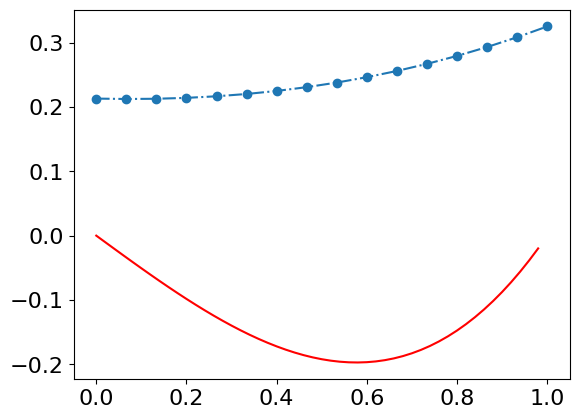

In [77]:
t = np.arange(0., 1., 0.02)
res = (t**3-t)/6
norm_res = np.linalg.norm(res)
res_norm = res/norm_res

xt = np.arange(0,1,1/dim)
exact = [1/6*(x**3-x) for x in np.arange(0,1,1/dim)]
norm = np.linalg.norm(exact)
exact = exact/norm

# red dashes, blue squares and green triangles
plt.plot(t, res_norm, 'r-', label='analytical')
plt.plot(bt, x, 'o-.', label='classical')
plt.plot(bt, quantum_solution, 'gx--', label='quantum')
# plt.legend()
plt.legend(loc="lower left")
plt.xlabel('Boundary [0,1]')
plt.ylabel('Solution Profile')
plt.title("4-qubit VQE for Poisson Eqn, TwoLocal, BFGS")
plt.grid(linestyle = '--', linewidth = 0.5)
# plt.show()
# plt.savefig("Poisson.png", bbox_inches='tight', dpi=300)